In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
df = pd.read_csv('secom.data', sep=" ", header=None)
print(data)

          0        1          2          3       4      5         6       7    \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
7     3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
8     2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
9     3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
10    2994.05  2548.21  2195.1222  1046.1468  1.3204  100.0  103.3400  0.1223   
11    2928.84  2479.40  2196



> Count number of NAs for each column



In [5]:
nas = [df[x].isna().sum() for x in df.columns]
print(nas)

[6, 7, 14, 14, 14, 14, 14, 9, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 10, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 7, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 794, 794, 6, 24, 24, 24, 24, 24, 24, 24, 24, 1, 12, 1341, 0, 0, 0, 51, 51, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 1018, 1018, 1018, 715, 0, 0, 0, 0, 0, 24, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 5, 6, 7, 14, 14, 14, 14, 14, 9, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 10, 0, 1429, 1429, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 7, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 24, 24, 24, 24, 24, 24, 24, 24, 1, 12, 1341, 0, 0, 0, 51, 51, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 1018, 1018, 1018, 715, 0, 0, 0, 0, 0, 24, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 5, 6, 7, 14, 14, 14, 14, 14, 9, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 10, 0, 1429, 1429, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2



> Read lables for the data



In [7]:
lables = pd.read_csv('secom_labels.data', sep=" ", header=None)
print(lables)

      0                    1
0    -1  19/07/2008 11:55:00
1    -1  19/07/2008 12:32:00
2     1  19/07/2008 13:17:00
3    -1  19/07/2008 14:43:00
4    -1  19/07/2008 15:22:00
5    -1  19/07/2008 17:53:00
6    -1  19/07/2008 19:44:00
7    -1  19/07/2008 19:45:00
8    -1  19/07/2008 20:24:00
9    -1  19/07/2008 21:35:00
10    1  19/07/2008 21:57:00
11    1  19/07/2008 22:52:00
12   -1  20/07/2008 03:35:00
13   -1  21/07/2008 08:21:00
14    1  21/07/2008 11:53:00
15   -1  22/07/2008 00:03:00
16   -1  22/07/2008 02:59:00
17   -1  22/07/2008 08:41:00
18   -1  22/07/2008 11:47:00
19   -1  22/07/2008 14:00:00
20   -1  22/07/2008 15:30:00
21   -1  23/07/2008 05:15:00
22   -1  23/07/2008 19:22:00
23    1  25/07/2008 15:23:00
24   -1  27/07/2008 04:18:00
25   -1  27/07/2008 09:37:00
26   -1  27/07/2008 11:10:00
27   -1  27/07/2008 15:46:00
28   -1  27/07/2008 16:06:00
29   -1  27/07/2008 16:49:00
...  ..                  ...
1537 -1  15/10/2008 18:16:00
1538 -1  15/10/2008 19:15:00
1539 -1  15/10



> Replace -1 with 0



In [8]:
lables = lables.replace(-1,0)
print(lables)

      0                    1
0     0  19/07/2008 11:55:00
1     0  19/07/2008 12:32:00
2     1  19/07/2008 13:17:00
3     0  19/07/2008 14:43:00
4     0  19/07/2008 15:22:00
5     0  19/07/2008 17:53:00
6     0  19/07/2008 19:44:00
7     0  19/07/2008 19:45:00
8     0  19/07/2008 20:24:00
9     0  19/07/2008 21:35:00
10    1  19/07/2008 21:57:00
11    1  19/07/2008 22:52:00
12    0  20/07/2008 03:35:00
13    0  21/07/2008 08:21:00
14    1  21/07/2008 11:53:00
15    0  22/07/2008 00:03:00
16    0  22/07/2008 02:59:00
17    0  22/07/2008 08:41:00
18    0  22/07/2008 11:47:00
19    0  22/07/2008 14:00:00
20    0  22/07/2008 15:30:00
21    0  23/07/2008 05:15:00
22    0  23/07/2008 19:22:00
23    1  25/07/2008 15:23:00
24    0  27/07/2008 04:18:00
25    0  27/07/2008 09:37:00
26    0  27/07/2008 11:10:00
27    0  27/07/2008 15:46:00
28    0  27/07/2008 16:06:00
29    0  27/07/2008 16:49:00
...  ..                  ...
1537  0  15/10/2008 18:16:00
1538  0  15/10/2008 19:15:00
1539  0  15/10



> Substitute NAs with mean of that particular column



In [9]:
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)
print(df)

              0        1            2            3         4      5    \
0     3030.930000  2564.00  2187.733300  1411.126500  1.360200  100.0   
1     3095.780000  2465.14  2230.422200  1463.660600  0.829400  100.0   
2     2932.610000  2559.94  2186.411100  1698.017200  1.510200  100.0   
3     2988.720000  2479.90  2199.033300   909.792600  1.320400  100.0   
4     3032.240000  2502.87  2233.366700  1326.520000  1.533400  100.0   
5     2946.250000  2432.84  2233.366700  1326.520000  1.533400  100.0   
6     3030.270000  2430.12  2230.422200  1463.660600  0.829400  100.0   
7     3058.880000  2690.15  2248.900000  1004.469200  0.788400  100.0   
8     2967.680000  2600.47  2248.900000  1004.469200  0.788400  100.0   
9     3016.110000  2428.37  2248.900000  1004.469200  0.788400  100.0   
10    2994.050000  2548.21  2195.122200  1046.146800  1.320400  100.0   
11    2928.840000  2479.40  2196.211100  1605.757800  0.995900  100.0   
12    2920.070000  2507.40  2195.122200  1046.14680

In [28]:
sum([df[x].isna().sum() for x in df.columns])

0



> Convert dataframe to numpy array



In [10]:
data = df.values
print(data)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]




> Mean for each column



In [11]:
mean_data = np.mean(data.T, axis=1)
print(mean_data)

[ 3.01445290e+03  2.49585023e+03  2.20054732e+03  1.39637663e+03
  4.19701314e+00  1.00000000e+02  1.01112908e+02  1.21821502e-01
  1.46286166e+00 -8.41022364e-04  1.45750799e-04  9.64352780e-01
  1.99956809e+02  0.00000000e+00  9.00537052e+00  4.13086035e+02
  9.90760281e+00  9.71443926e-01  1.90047354e+02  1.24810340e+01
  1.40505424e+00 -5.61839361e+03  2.69937843e+03 -3.80629973e+03
 -2.98598136e+02  1.20384473e+00  1.93847681e+00  6.63862799e+00
  6.94995323e+01  2.36619744e+00  1.84158914e-01  3.67318939e+00
  8.53374687e+01  8.96027854e+00  5.05826386e+01  6.45557870e+01
  4.94173705e+01  6.62212736e+01  8.68365766e+01  1.18679554e+02
  6.79049093e+01  3.35306617e+00  7.00000000e+01  3.55538904e+02
  1.00311650e+01  1.36743060e+02  7.33672811e+02  1.17795811e+00
  1.39972231e+02  1.00000000e+00  6.32254197e+02  1.57420991e+02
  0.00000000e+00  4.59297121e+00  4.83852271e+00  2.85617210e+03
  9.28849328e-01  9.49215035e-01  4.59331177e+00  2.96024147e+00
  3.55159094e+02  1.04231



> Subtract means from each column



In [12]:
diff_data = data - mean_data
print(diff_data)

[[ 1.64771044e+01  6.81497692e+01 -1.28140177e+01 ... -2.42861287e-17
  -1.73472348e-17 -1.56319402e-13]
 [ 8.13271044e+01 -3.07102308e+01  2.98748823e+01 ...  3.62509579e-03
   7.16666667e-04  1.08534434e+02]
 [-8.18428956e+01  6.40897692e+01 -1.41362177e+01 ...  3.19250958e-02
   9.51666667e-03 -1.68098663e+01]
 ...
 [-3.56428956e+01 -1.16070231e+02  5.75268229e+00 ... -7.87490421e-03
  -2.78333333e-03 -5.61469663e+01]
 [-1.19532896e+02  3.61597692e+01 -2.35140177e+01 ...  8.02509579e-03
   2.21666667e-03 -6.17596635e+00]
 [-6.95328956e+01 -4.50902308e+01 -5.10291771e+00 ... -2.74904215e-04
  -7.83333333e-04  3.81143337e+01]]




> Calculate covariance matrix



In [13]:
cov_mat = np.cov(diff_data.T)
print(cov_mat)

[[ 5.39940056e+03 -8.47962623e+02  1.02671010e+01 ... -1.67440688e-02
  -5.93197815e-03  2.87879850e+01]
 [-8.47962623e+02  6.43649877e+03  1.35942679e+01 ...  1.21967287e-02
   2.32652705e-03  3.37335304e+02]
 [ 1.02671010e+01  1.35942679e+01  8.63239193e+02 ... -7.59126039e-03
  -2.59521865e-03 -9.07023669e+01]
 ...
 [-1.67440688e-02  1.21967287e-02 -7.59126039e-03 ...  7.75231441e-05
   2.45865358e-05  3.22979001e-01]
 [-5.93197815e-03  2.32652705e-03 -2.59521865e-03 ...  2.45865358e-05
   8.21484994e-06  1.04706789e-01]
 [ 2.87879850e+01  3.37335304e+02 -9.07023669e+01 ...  3.22979001e-01
   1.04706789e-01  8.81006310e+03]]




> Comput Eigen values and Eigen vectors



In [14]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print(eig_val_cov, eig_vec_cov)

[ 5.34151979e+07+0.00000000e+00j  2.17466719e+07+0.00000000e+00j
  8.24837662e+06+0.00000000e+00j  2.07388086e+06+0.00000000e+00j
  1.31540439e+06+0.00000000e+00j  4.67693557e+05+0.00000000e+00j
  2.90863555e+05+0.00000000e+00j  2.83668601e+05+0.00000000e+00j
  2.37155830e+05+0.00000000e+00j  2.08513836e+05+0.00000000e+00j
  1.96098849e+05+0.00000000e+00j  1.86856549e+05+0.00000000e+00j
  1.52422354e+05+0.00000000e+00j  1.13215032e+05+0.00000000e+00j
  1.08493848e+05+0.00000000e+00j  1.02849533e+05+0.00000000e+00j
  1.00166164e+05+0.00000000e+00j  8.33473762e+04+0.00000000e+00j
  8.15850591e+04+0.00000000e+00j  7.76560524e+04+0.00000000e+00j
  6.66060410e+04+0.00000000e+00j  6.52620058e+04+0.00000000e+00j
  5.96776503e+04+0.00000000e+00j  5.16269933e+04+0.00000000e+00j
  5.03324580e+04+0.00000000e+00j  4.54661746e+04+0.00000000e+00j
  4.41914029e+04+0.00000000e+00j  4.15532551e+04+0.00000000e+00j
  3.55294040e+04+0.00000000e+00j  3.31436743e+04+0.00000000e+00j
  2.67385181e+04+0.000000

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


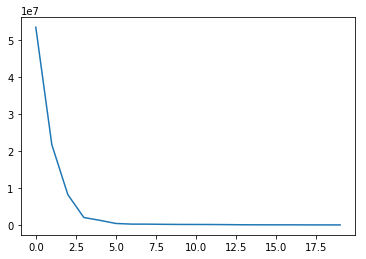

In [15]:
plt.plot(eig_val_cov[:20])

In [37]:
eig_vec_cov.shape

(590, 590)

In [38]:
eig_val_cov.shape

(590,)



> Get indexes of the sorted eigen values



In [39]:
idx = np.argsort(eig_val_cov)[::-1]

In [40]:
P = eig_vec_cov.T.dot(diff_data.T)

In [41]:
len(P)

590

In [42]:
np.var(P[0,:])

53381110.302403666

In [43]:
variances = np.array([np.var(P[x,:]) for x in range(P.shape[0])])

In [44]:
variances[:10]

array([53381110.30240367, 21732794.00299704,  8243112.81400466,
        2072557.38714381,  1314564.94654084,   467395.09304467,
         290677.93732237,   283487.5741031 ,   237004.48591036,
         208380.77019583])



> Plot the variances



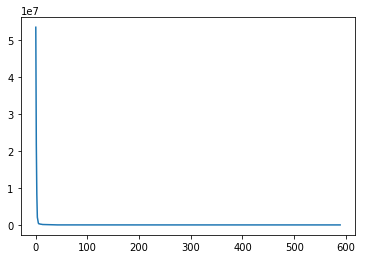

In [45]:
plt.plot(variances)
plt.show()

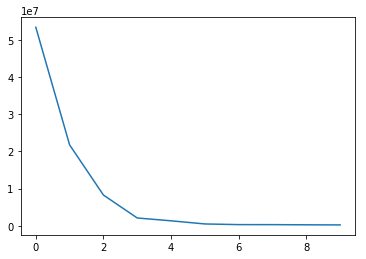

In [46]:
plt.plot(variances[:10])
plt.show()

5 is the saturation point